In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
from sklearn.svm import SVR
from sklearn import tree
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import PolynomialFeatures 
%matplotlib inline
from matplotlib import pyplot as plt



# Q1.
## Q1.1
Using make_regression to generate data, create and train the following models:
- Linear Regression
- Support Vector Regression ([see here](https://scikit-learn.org/stable/modules/svm.html#regression))
- Decision Tree Regression ([see here](https://scikit-learn.org/stable/modules/tree.html#regression))

Make sure to use the same data for each model. Plot the data labels and overlay model predictions. Which model performs better? For the SVR, change the `kernel` parameter between 'rbf','linear', and 'poly'.

## Q1.2
Create a new function, similar to "create_data" in Section 1 exercises. Instead of a weighted sum, implement the following:  

\begin{equation}
y = A*sin(f x) + V*noise
\end{equation}

The function should meet the following specifications:
- x is a user-specified [n by 1] array, where n is the number of elements.  
- A is a user-specified scalar. It corresponds to the amplitude of the sine.  
- f is a user-specified scalar. It corresponds to the frequency of the sine.  
- V is a user-specified sclar. It corresponds to the variance of the noise.  
- noise is a normally-distributed random value added to each sample.  
- y is the returned [n by 1] array.  
  
Re-initialize models from Q1.1 and train them on (x, y). Plot the data labels and overlay predictions. Which models perform better?  
Hint: numpy.sin ; numpy.random.randn

## Q1.3
Using the noisy sine function from Q1.2, generate new data. Use `PolynomialFeatures` as we did in Section 1 to create powers of our features (`x`). Training the models from Q1.2 using our new `x_poly` features, how do the models trained on `x_poly` compare to the ones trained on `x` in Q1.2?


375
125
375
125


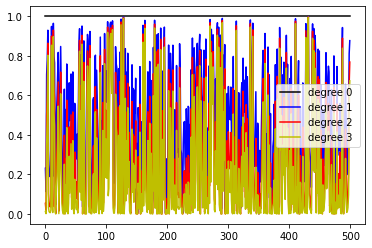

In [140]:
# Generate new data using make_regression
'''
x_data, y_label, coef = make_regression(n_samples=500, n_features=10, n_informative=7, 
                                        noise=50, coef=True, random_state=50)

x_train, x_test, y_train, y_test =  train_test_split(x_data, y_label, random_state=42)
print(x_train.shape)
print(x_test.shape)
'''

def create_data(X_n_1, A, f, V):
    y_list = []
    for i in X_n_1:
        rand = numpy.random.randn()
        sin = numpy.sin(i*f) 
        y =   A*sin + V*rand
        y_list.append(y)
    return y_list

x_data = list(numpy.random.random((500,1)))
A = 5
f = 2
V = 3
y_label = create_data(x_data, A, f, V)
assert len(y_label) == len(x_data)




poly_feat_maker = PolynomialFeatures(degree=3)  # Initialize object
x_data = poly_feat_maker.fit_transform(x_data)  # Apply transformation

plt.plot(x_data[:,0], 'k')
plt.plot(x_data[:,1], 'b')
plt.plot(x_data[:,2], 'r')
plt.plot(x_data[:,3], 'y')
plt.legend(['degree 0','degree 1 ','degree 2','degree 3'])


x_train, x_test, y_train, y_test =  train_test_split(x_data, y_label, random_state=42)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

Text(0, 0.5, 'label value')

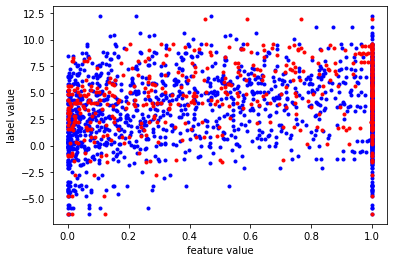

In [141]:
# Plot data using different colors
plt.figure()
plt.plot(x_train, y_train, '.', color='blue')
plt.plot(x_test, y_test, '.', color='red')
plt.xlabel('feature value')
plt.ylabel('label value')

[[  0.          13.25721912 -10.21908689   1.40623003]]
[-0.18440581]


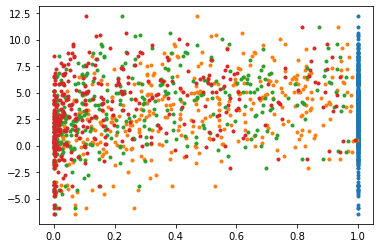

In [142]:
mdl = LinearRegression()
mdl.fit(x_train, y_train)
print(mdl.coef_)
print(mdl.intercept_)
plt.figure()
plt.plot(x_train, y_train,'.')

Trained
0.19139924396138597
9.312549032376873


Predicted
0.07723216830364965
9.333883581570893



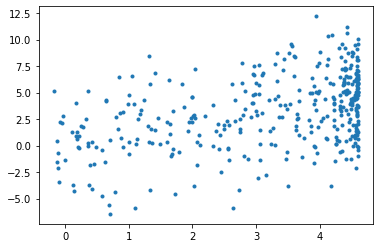

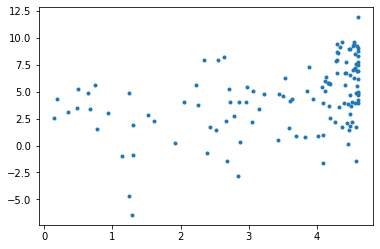

In [143]:
import sklearn.metrics

y_train_pred = mdl.predict(x_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
mse = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
print("Trained")
print(r2)
print(mse)
print()
plt.figure()
plt.plot(y_train_pred, y_train,'.')
print()

y_test_pred = mdl.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_test_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_test_pred)
print("Predicted")
print(r2)
print(mse)

plt.figure()
plt.plot(y_test_pred, y_test,'.')
print()

In [144]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_models = [svr_rbf, svr_lin, svr_poly]

Trained
0.19139924396138597
9.312549032376873
Predicted
0.12270148866772557
8.873957120945105

Trained
0.19139924396138597
9.312549032376873
Predicted
0.1148632062064715
8.953242086740152

Trained
0.19139924396138597
9.312549032376873
Predicted
0.11471729604044589
8.954717981820442



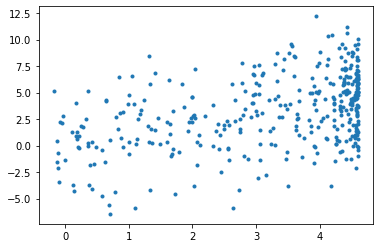

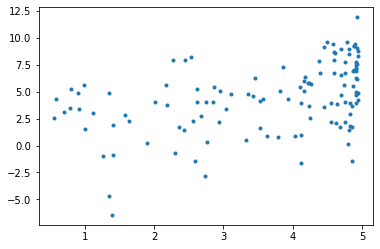

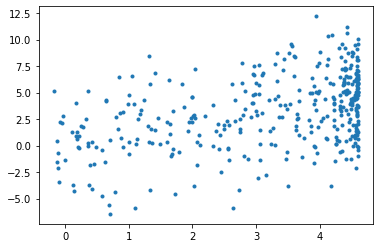

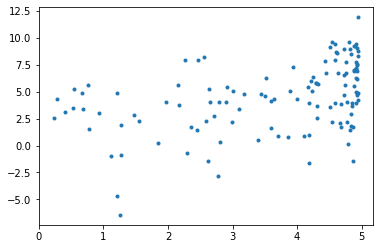

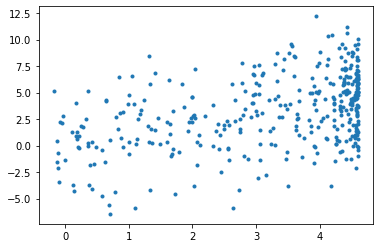

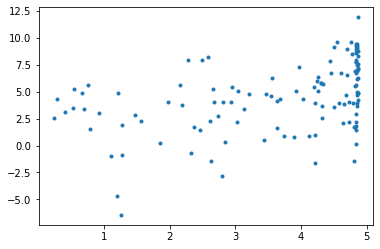

In [145]:
for m in svr_models:
    m.fit(numpy.array(x_train), numpy.array(y_train).ravel())

    r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
    mse = sklearn.metrics.mean_squared_error(y_train, y_train_pred)
    print("Trained")
    print(r2)
    print(mse)
    plt.figure()
    plt.plot(y_train_pred, y_train,'.')
    
    y_pred_test = m.predict(x_test)
    r2 = sklearn.metrics.r2_score(y_test, y_pred_test)
    mse = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    print("Predicted")
    print(r2)
    print(mse)
    print()
    plt.figure()
    plt.plot(y_pred_test,y_test,'.')
